# Julia Programming Tutorial

Julia is a modern programming language designed specifically for scientific computing that solves the "two-language problem" in scientific computing.

What is the two-language problem?
* Researchers prototype in a slow language (Python/MATLAB)
* Then rewrite in a fast language (C++) for production
* Julia eliminates this need by providing both in one language

Key Features:
* High-level syntax (like Python)
* High performance (like C/C++)
* Dynamic programming
* Just-in-time (JIT) compilation

# Core Advantages

1. Performance:
- Nearly as fast as C/C++
- No need to rewrite code for speed
- Built-in parallel processing

2. Ease of Use:
- Similar to Python/MATLAB syntax
- Interactive development
- Built-in package manager

3. Modern Features:
- Multiple dispatch (core feature)
- Unicode support
- Free and open-source

---

## Installation
Let's start by installing Julia.


In [36]:
# @title Robust Installation with Error Handling
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.9.3"    # Latest stable version
JULIA_PACKAGES="IJulia Plots BenchmarkTools DataFrames Statistics"
JULIA_NUM_THREADS=4
#---------------------------------------------------#

if [ -z `which julia` ]; then
    # Install Julia
    echo "Installing Julia $JULIA_VERSION..."
    wget -q "https://julialang-s3.julialang.org/bin/linux/x64/1.9/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
    tar -xzf julia-$JULIA_VERSION-linux-x86_64.tar.gz -C /usr/local --strip-components 1
    rm julia-$JULIA_VERSION-linux-x86_64.tar.gz

    # Install required packages
    echo "Installing packages..."
    for PKG in $JULIA_PACKAGES; do
        echo "Installing $PKG..."
        julia -e "using Pkg; Pkg.add(\"$PKG\"); using $PKG"
    done

    echo "Installation complete! Ready to use Julia."
else
    echo "Julia is already installed"
fi

Julia is already installed


In [37]:
%%shell
julia --version

julia version 1.9.3


In [23]:
!julia -e 'using Pkg; Pkg.add("IJulia")'

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [7]:
from IPython.core.magic import register_cell_magic
from subprocess import getoutput

@register_cell_magic
def julia(line, cell):
    script = cell.replace("'", "'\\''")
    result = getoutput(f"julia -e '{script}'")
    print(result)

In [38]:
%%julia
# Interactive help examples
methods(println)
println("This is a test")

This is a test


---

# Variables and Basic Types

Julia supports multiple variable types:

1. Numeric Types:
- Integers (Int64, Int32)
- Floating-point (Float64, Float32)
- Complex numbers

2. Text Types:
- Strings (text)
- Characters (single letters)

3. Logical Type:
- Boolean (true/false)

Special Feature: Unicode Support
You can use Greek letters in variable names:
α (alpha) for significance levels
β (beta) for coefficients

## Basic Data Types and Operations


In [39]:
%%julia
# Numbers
x = 44              # Integer
y = 3.14           # Float
z = 1 + 2im        # Complex number

println("Types of variables:")
println("x ($(x)): ", typeof(x))
println("y ($(y)): ", typeof(y))
println("z ($(z)): ", typeof(z))

Types of variables:
x (44): Int64
y (3.14): Float64
z (1 + 2im): Complex{Int64}


In [40]:
%%julia
#Shows different variable types
# Basic biomedical data types
patient_id = "P12345"                # String
heart_rate = 72                      # Int64
body_temp = 37.2                     # Float64
is_hypertensive = false              # Bool
ecg_signal = 1.2 + 0.5im            # Complex - for signal processing

# Print with formatted string
println("Patient Status:")
println("ID: $patient_id")
println("Heart Rate: $heart_rate bpm")
println("Temperature: $body_temp °C")
println("Hypertensive: $is_hypertensive")
println("ECG Signal: $(ecg_signal)")

Patient Status:
ID: P12345
Heart Rate: 72 bpm
Temperature: 37.2 °C
Hypertensive: false
ECG Signal: 1.2 + 0.5im


---


#Arithmetic Operators
The following arithmetic operators are supported on all primitive numeric types:

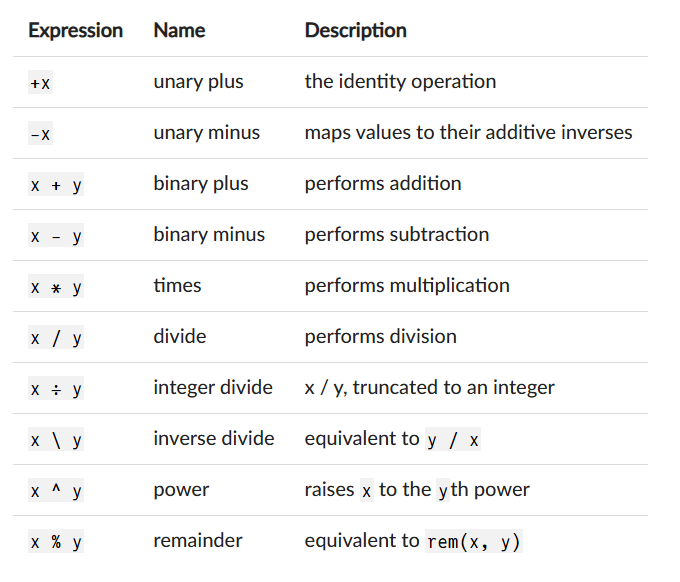


---

## Data Structures

Julia provides several built-in data structures:
1. Arrays (1D, 2D, and N-dimensional)
2. Dictionaries (key-value pairs)
3. Custom Structures (using struct)

In [41]:
%%julia
# Arrays and basic operations
# 1D Array (Vector)
vital_signs = [98.6, 72, 120/80]
println("Vital Signs: ", vital_signs)

# 2D Array (Matrix)
lab_results = [
    1.2  2.3  3.4;
    4.5  5.6  6.7
]
println("\nLab Results Matrix:")
println(lab_results)

# Dictionary
patient = Dict(
    "name" => "John Doe",
    "age" => 45,
    "blood_type" => "O+"  # instead of Python :
)
println("\nPatient Info:")
println(patient)

Vital Signs: [98.6, 72.0, 1.5]

Lab Results Matrix:
[1.2 2.3 3.4; 4.5 5.6 6.7]

Patient Info:
Dict{String, Any}("name" => "John Doe", "blood_type" => "O+", "age" => 45)


---

## Control Flow

Julia uses familiar control flow structures:
1. Conditional statements (if-elseif-else)
2. Loops (for, while)
3. Functions with multiple dispatch

In [42]:
%%julia
### 1. Conditional Statements (if-elseif-else) ###
function grade_score(score)
    if score >= 90
        return "A"
    elseif score >= 80
        return "B"
    elseif score >= 70
        return "C"
    else
        return "F"
    end
end

# Test the conditional function
println("Grades:")
println("95 points = $(grade_score(95))")
println("85 points = $(grade_score(85))")
println("65 points = $(grade_score(65))")

Grades:
95 points = A
85 points = B
65 points = F


In [43]:
%%julia
### 2. Loops ###
# Loop example
println("For Loop - Counting 1 to 5:")
for i in 1:5   # Julia way for running this loop 5 times
    println(i)
end

# While Loop example
println("\nWhile Loop - Count until reaching 10:")
sum = 0
while sum < 10
    global sum += 2
    println("Sum is now: $sum")
end

For Loop - Counting 1 to 5:
1
2
3
4
5

While Loop - Count until reaching 10:
Sum is now: 2
Sum is now: 4
Sum is now: 6
Sum is now: 8
Sum is now: 10


In [44]:
%%julia
### 3. Functions with Multiple Dispatch ###
# Function that handles different types
function add_bonus(score::Int64)
    println("Processing integer score...")
    return score + 5
end

function add_bonus(score::Float64)
    println("Processing float score...")
    return score + 2.5
end

# Test multiple dispatch
println("Adding bonus to different types:")
println("Integer score 80: $(add_bonus(80))")
println("Float score 85.5: $(add_bonus(85.5))")

Adding bonus to different types:
Processing integer score...
Integer score 80: 85
Processing float score...
Float score 85.5: 88.0


---

## Data Visualization

Set up plotting using PyPlot backend:

In [11]:
!apt-get install python3-tk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-tk is already the newest version (3.10.8-1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [45]:
%%julia
using Pkg
Pkg.add(["Plots", "UnicodePlots"])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [32]:
%%julia
using Pkg
Pkg.add(["Plots", "ImageShow", "FileIO"])

   Resolving package versions...
   Installed PaddedViews ── v0.5.12
   Installed MappedArrays ─ v0.4.2
   Installed StackViews ─── v0.1.1
   Installed OffsetArrays ─ v1.14.2
   Installed MosaicViews ── v0.3.4
   Installed FileIO ─────── v1.16.6
   Installed ImageShow ──── v0.3.8
   Installed ImageCore ──── v0.10.5
   Installed ImageBase ──── v0.1.7
    Updating `~/.julia/environments/v1.9/Project.toml`
  [5789e2e9] + FileIO v1.16.6
  [4e3cecfd] + ImageShow v0.3.8
    Updating `~/.julia/environments/v1.9/Manifest.toml`
  [5789e2e9] + FileIO v1.16.6
  [c817782e] + ImageBase v0.1.7
  [a09fc81d] + ImageCore v0.10.5
  [4e3cecfd] + ImageShow v0.3.8
  [dbb5928d] + MappedArrays v0.4.2
  [e94cdb99] + MosaicViews v0.3.4
  [6fe1bfb0] + OffsetArrays v1.14.2
  [5432bcbf] + PaddedViews v0.5.12
  [cae243ae] + StackViews v0.1.1
Precompiling project...
  ✓ MappedArrays
  ✓ OffsetArrays
  ✓ StackViews
  ✓ PaddedViews
  ✓ MosaicViews
  ✓ FileIO
  ✓ FileIO → HTTPExt
  ✓ Plots → FileIOExt
  ✓ ImageCore
  

In [46]:
%%julia
using Plots

# Generate points for sine wave
x = 0:0.1:10
y = sin.(x)

# Create the plot
p = plot(x, y,
    title="Sine Wave",
    xlabel="x",
    ylabel="sin(x)",
    label="sin(x)",
    linewidth=2,
    color=:red)

# Save the plot
savefig(p, "sine_wave.png")



GKS: cannot open display - headless operation mode active


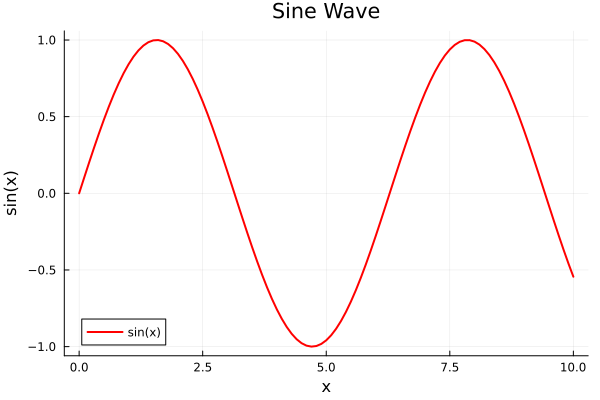

In [47]:
from IPython.display import Image
Image("sine_wave.png")

---

# Unique Features in Julia

Julia has several special features that make it particularly useful for scientific computing:

1. Unicode Support
   - Can use Greek letters in variable names
   - Useful for mathematical and scientific notation
   - Type \alpha + TAB for α, \beta + TAB for β

2. Broadcasting Operations
   - Apply functions to arrays using dot notation
   - More elegant than traditional loops
   - Similar to vectorization in other languages


In [48]:
%%julia
# Unicode variable names
α = 0.05  # significance level
β = 1.5   # coefficient
println("Alpha (α) value: $α")
println("Beta (β) value: $β")

# broadcasting
numbers = [1, 2, 3, 4]
squared = numbers.^2
println("\nOriginal numbers: $numbers")
println("Squared numbers: $squared")

# More broadcasting examples
doubled = 2 .* numbers
println("Doubled numbers: $doubled")

Alpha (α) value: 0.05
Beta (β) value: 1.5

Original numbers: [1, 2, 3, 4]
Squared numbers: [1, 4, 9, 16]
Doubled numbers: [2, 4, 6, 8]


# Summary

In this tutorial, we learned about Julia, a programming language made for scientific computing. Here's what we covered:

The Basics:
- How to write and run Julia code
- Different types of variables (numbers, text, true/false)
- How to create lists (arrays) and dictionaries
- Ways to control our program (if statements and loops)

Features:
- Using Greek letters in variable names (like α and β)
- Printing text with variables inside (using $)
- Working with arrays and lists easily
- Making simple plots

Why Julia is Special:
- It's as fast as C++ but as easy as Python
- You can write mathematical formulas just like you'd write them on paper
- It's free and open-source
- It works great for scientific calculations


 Julia is great for scientific work because it combines the best of both worlds - it's easy to write and fast to run!

Resources:
- Julia Documentation: https://docs.julialang.org
- Stack Overflow [julia] tag
- BioJulia: https://biojulia.net